<br><br>
<font size = "6">
<b>Assignment</b>
</font>


<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

# Open Data Set

- We will use open dataset to apply what we have learned.


- The open dataset which we will use for regression is 'Weather in Szeged 2006 - 2016' from kaggle.
 - Is there a relationship between humidity and temperature? 
 - What about between humidity and apparent temperature? 

- You can download the dataset from below url but already included in 'data_files/weatherHistory.csv'.

 - https://www.kaggle.com/budincsevity/szeged-weather/version/1#weatherHistory.csv




## 1. Data load (5pt)
**Read the file 'weatherHistory.csv' and show top 5 rows using the pandas module**

In [3]:
import pandas as pd
import numpy as np
weatherHistory = pd.read_csv('./weatherHistory.csv')
weatherHistory.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 2. Data Drop (5pt)
**Delete 5 columns**
- 'Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'

In [5]:
weatherHistory_drop = weatherHistory.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'],axis = 1)
weatherHistory_drop.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


## 3. Data Plotting (5pt)
**Visualize column 'Apparent Temperature (C)' using matplotlib module**

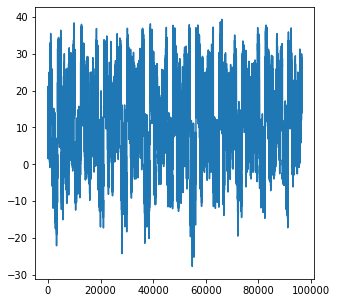

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.plot(weatherHistory_drop['Apparent Temperature (C)'])
plt.show()

## 4. Data Sorting (5pt)
**Sort in ascending order by the column 'Apparent Temperature (C)'**

In [22]:
result = weatherHistory_drop.sort_values(by = ['Apparent Temperature (C)'], axis = 0, ascending = True)

In [104]:
result.reset_index(inplace = True)

In [119]:
result.drop(['index'],axis = 1,inplace = True)

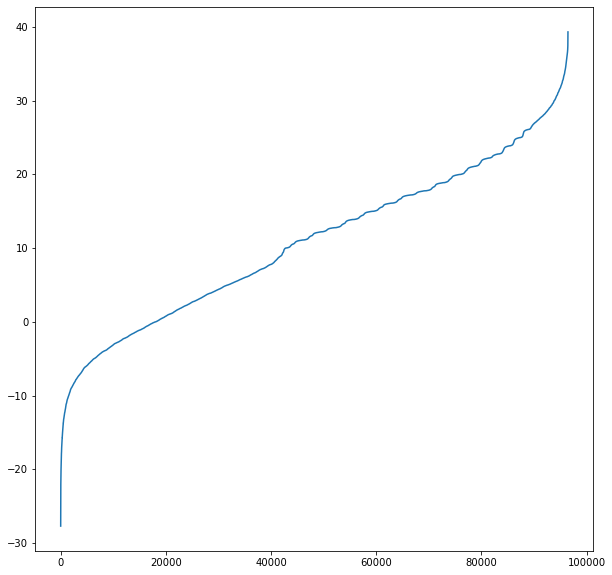

In [150]:
plt.figure(figsize = (10,10))
plt.plot(result['Apparent Temperature (C)'])
plt.show()

## 5. Feature Selection (5 pt)
**split train and target columns**
- target column: Apparent Temperature
- train columns: else

In [137]:
result.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-20.000000,-27.716667,0.78,11.2700,20.0,0.0000,1033.30
1,-20.000000,-26.227778,0.82,8.0500,340.0,1.4490,1032.60
2,-20.555556,-25.922222,0.78,6.4400,30.0,1.4490,1032.10
3,-20.050000,-25.200000,0.78,6.2146,170.0,1.7066,1034.74
4,-20.277778,-25.072222,0.79,5.6672,158.0,1.8032,1033.53


In [138]:
Target = result['Apparent Temperature (C)']
Train = result.drop(['Apparent Temperature (C)'],axis=1)

In [139]:
Train.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-20.000000,0.78,11.2700,20.0,0.0000,1033.30
1,-20.000000,0.82,8.0500,340.0,1.4490,1032.60
2,-20.555556,0.78,6.4400,30.0,1.4490,1032.10
3,-20.050000,0.78,6.2146,170.0,1.7066,1034.74
4,-20.277778,0.79,5.6672,158.0,1.8032,1033.53


# Predict Apparent Temperature

## 6. Least Square Solution
**a) Predict $\hat{y}$ using least square solution (20 pt)**

In [123]:
Train.values.reshape(-1,6)

##식을 이용

array([[-2.00000000e+01,  7.80000000e-01,  1.12700000e+01,
         2.00000000e+01,  0.00000000e+00,  1.03330000e+03],
       [-2.00000000e+01,  8.20000000e-01,  8.05000000e+00,
         3.40000000e+02,  1.44900000e+00,  1.03260000e+03],
       [-2.05555556e+01,  7.80000000e-01,  6.44000000e+00,
         3.00000000e+01,  1.44900000e+00,  1.03210000e+03],
       ...,
       [ 3.78722222e+01,  2.70000000e-01,  1.57136000e+01,
         2.12000000e+02,  9.98200000e+00,  1.01188000e+03],
       [ 3.72666667e+01,  3.20000000e-01,  1.37494000e+01,
         1.75000000e+02,  9.98200000e+00,  1.01315000e+03],
       [ 3.49555556e+01,  4.70000000e-01,  1.23970000e+01,
         2.13000000e+02,  1.12700000e+01,  1.01112000e+03]])

In [172]:
def findweight(x,y):
    x_bar = x.mean()
    y_bar = y.mean()
    alpha = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
    return alpha

def findbias(x,y):
    x_bar = x.mean()
    y_bar = y.mean()
    beta = y_bar - calculated_weight * x_bar
    return beta

In [173]:
Train.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-20.000000,0.78,11.2700,20.0,0.0000,1033.30
1,-20.000000,0.82,8.0500,340.0,1.4490,1032.60
2,-20.555556,0.78,6.4400,30.0,1.4490,1032.10
3,-20.050000,0.78,6.2146,170.0,1.7066,1034.74
4,-20.277778,0.79,5.6672,158.0,1.8032,1033.53


In [175]:

x =  np.zeros((6,1))
w1 = findweight(Train['Temperature (C)'].values,Target)
w2 = findweight(Train['Humidity'].values,Target)
w3 = findweight(Train['Wind Speed (km/h)'].values,Target)
w4 = findweight(Train['Wind Bearing (degrees)'].values,Target)
w5 = findweight(Train['Visibility (km)'].values,Target)
w6 = findweight(Train['Pressure (millibars)'].values,Target)
bias = findbias(Train.values, Target)


print(w1)
# for i in range(25):    
#     df = H*x + beta
#     x = x - alpha *df

# print(x)

NameError: name 'calculated_weight' is not defined

In [186]:
Train['Temperature (C)'].values.reshape(-1,1)

array([[-20.        ],
       [-20.        ],
       [-20.55555556],
       ...,
       [ 37.87222222],
       [ 37.26666667],
       [ 34.95555556]])

In [189]:
#% matplotlib qt5

A = np.hstack([np.ones((len(Target),1)),Train['Temperature (C)'].values.reshape(-1,1)])##가로로 쌓음
A = np.asmatrix(A)
theta = (A.T*A).I*A.T*Target.reshape(-1,1)


AttributeError: 'Series' object has no attribute 'reshape'

**b) Plotting real value $y$ and predict value $\hat{y}$ (5 pt)**

In [125]:
# xp = np.linspace(np.min(x),np.max(x)).reshape(-1,1)
# Ap = np.hstack([xp, xp**2])
# Ap = np.asmatrix(Ap)

# # to plot
# plt.figure(figsize = (10,8))
# plt.title('Regression',fontsize = 15)
# plt.xlabel('X', fontsize = 15)
# plt.ylabel('Y', fontsize = 15)
# plt.plot(x,y,'o',markersize = 4, label = 'actual')
# # to plot a straight line (fitted line)

# plt.plot(xp, reg.predict(Ap),'r', linewidth=2,label = 'regression')
# plt.grid(alpha = 0.3)
# plt.legend(fontsize = 15)
# plt.show()
    


## 7. Gradient Descent
**a) Predict $\hat{y}$ using gradient descent method (20 pt)**

In [ ]:
##for문

**b) Plotting real value $y$ and predict value $\hat{y}$ (5 pt)**

## 8. Sklearn Module
**a) Predict $\hat{y}$ using LinearRegression module with Sklearn (20 pt)**

In [140]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Train,Target)


LinearRegression()

In [141]:
reg.coef_

array([ 1.12559725e+00,  1.03177793e+00, -9.56567814e-02,  5.31492999e-04,
       -8.15209127e-04,  2.00142626e-04])

In [142]:
reg.intercept_

-2.592517505504576

In [148]:
Train

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-20.000000,0.78,11.2700,20.0,0.0000,1033.30
1,-20.000000,0.82,8.0500,340.0,1.4490,1032.60
2,-20.555556,0.78,6.4400,30.0,1.4490,1032.10
3,-20.050000,0.78,6.2146,170.0,1.7066,1034.74
4,-20.277778,0.79,5.6672,158.0,1.8032,1033.53
...,...,...,...,...,...,...
96448,37.072222,0.31,15.1501,205.0,10.3523,1012.63
96449,36.972222,0.32,10.5294,224.0,9.9820,1018.76
96450,37.872222,0.27,15.7136,212.0,9.9820,1011.88
96451,37.266667,0.32,13.7494,175.0,9.9820,1013.15


**b) Plotting real value $y$ and predict value $\hat{y}$ (5 pt)**

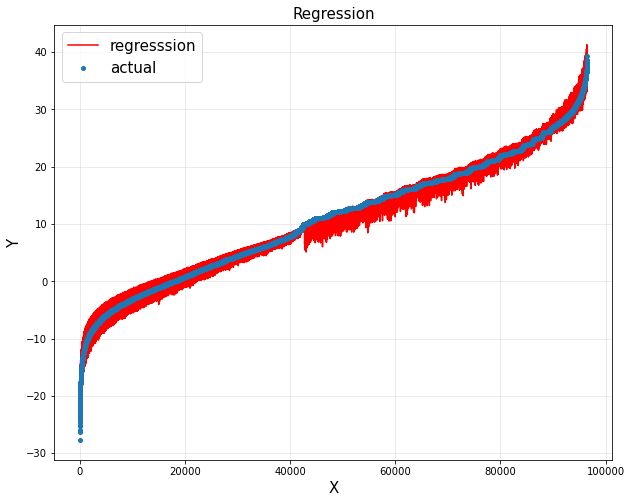

In [161]:
plt.figure(figsize = (10,8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
# plt.plot(Train.values,Target,'o',markersize = 4, label = 'actual')
# to plot a straight line (fitted line)
plt.plot(reg.predict(Train.values), 'r', label = 'regresssion')
plt.plot(Target, 'o',markersize = 4,label = 'actual')

plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

36.35882691941963